# Comparing Experimental Data Using Coin-shaped Geometry

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
You should consider upgrading via the '/home/katiez/FUSE/pybamm/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Choose Ecker dataset

In [2]:
os.path.abspath(os.curdir)

'/home/katiez/FUSE/PyBaMM'

In [3]:
coin = {"particle shape":"negative coin"}

In [4]:
chemistry = pybamm.parameter_sets.Ecker2015

Load Data

In [5]:
# load ecker data
voltage_data_1C = pd.read_csv("pybamm/input/discharge_data/Ecker_1C.csv", header=None).to_numpy()
voltage_data_5C = pd.read_csv("pybamm/input/discharge_data/Ecker_5C.csv", header=None).to_numpy()

Choosing DFN as model1 (with spherical surface area to volume ratio) and SPMe as model 2

In [6]:
# choose DFN
var = pybamm.standard_spatial_vars
model1 = pybamm.lithium_ion. DFN(build=False, options=coin)
# add rho_n
model1.variables.update(
    {
        "rho_n": var.rho_n,
        "rho_n [m]": var.rho_n * model1.param.R_n,
    }
)
# delete r_n
model1.variables.pop('r_n', None)
model1.variables.pop('r_n [m]', None)
model1.build_model()

# pick parameters, keeping C-rate as an input to be changed for each solve
parameter_values1 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values1.update({"Current function [A]": "[input]"})
parameter_values1.update({"Negative particle radius [m]": 3e-05})
parameter_values1.update(
    {
        "Positive electrode surface area to volume ratio [m-1]": (3 * (1 - parameter_values1['Positive electrode porosity']) * parameter_values1['Positive electrode active material volume fraction']) / parameter_values1['Positive particle radius [m]'],
        "Negative electrode surface area to volume ratio [m-1]": (2 * (1 - parameter_values1['Negative electrode porosity']) * parameter_values1['Negative electrode active material volume fraction']) / parameter_values1['Negative particle radius [m]'],
        "Negative surface area per unit volume distribution in x": 1.0,
        "Positive surface area per unit volume distribution in x": 1.0,
    },
    check_already_exists=False,
)
parameter_values1.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry['anode'])

In [7]:
# choose SPMe
var = pybamm.standard_spatial_vars
model2 = pybamm.lithium_ion. SPMe(build=False, options=coin)
# add rho_n
model2.variables.update(
    {
        "rho_n": var.rho_n,
        "rho_n [m]": var.rho_n * model2.param.R_n,
    }
)
# delete r_n
model2.variables.pop('r_n', None)
model2.variables.pop('r_n [m]', None)
model2.build_model()

# pick parameters, keeping C-rate as an input to be changed for each solve
chemistry = pybamm.parameter_sets.Ecker2015
parameter_values2 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values2.update({"Current function [A]": "[input]"})
parameter_values2.update({"Negative particle radius [m]": 3e-05})
parameter_values2.update(
    {
        "Positive electrode surface area to volume ratio [m-1]": (3 * (1 - parameter_values2['Positive electrode porosity']) * parameter_values2['Positive electrode active material volume fraction']) / parameter_values2['Positive particle radius [m]'],
        "Negative electrode surface area to volume ratio [m-1]": (2 * (1 - parameter_values2['Negative electrode porosity']) * parameter_values2['Negative electrode active material volume fraction']) / parameter_values2['Negative particle radius [m]'],
        "Negative surface area per unit volume distribution in x": 1.0,
        "Positive surface area per unit volume distribution in x": 1.0,
    },
    check_already_exists=False,
)
parameter_values2.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry['anode'])

Model3 is normal spherical model

In [8]:
# choose DFN
model3 = pybamm.lithium_ion.DFN()
# choose SPMe
model4 = pybamm.lithium_ion.SPMe()

# pick parameters, keeping C-rate as an input to be changed for each solve
chemistry = pybamm.parameter_sets.Ecker2015
parameter_values3 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values3.update({"Current function [A]": "[input]"})

In [9]:
var = pybamm.standard_spatial_vars
var_pts1 = {
    var.x_n: int(parameter_values1.evaluate(model1.param.L_n / 1e-6)),
    var.x_s: int(parameter_values1.evaluate(model1.param.L_s / 1e-6)),
    var.x_p: int(parameter_values1.evaluate(model1.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values1.evaluate(model1.param.R_n / 1e-7)),
    var.r_p: int(parameter_values1.evaluate(model1.param.R_p / 1e-7)),
}
var_pts2 = {
    var.x_n: int(parameter_values2.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values2.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values2.evaluate(model2.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values2.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values2.evaluate(model2.param.R_p / 1e-7)),
}
var_pts3 = {
    var.x_n: int(parameter_values3.evaluate(model3.param.L_n / 1e-6)),
    var.x_s: int(parameter_values3.evaluate(model3.param.L_s / 1e-6)),
    var.x_p: int(parameter_values3.evaluate(model3.param.L_p / 1e-6)),
    var.r_n: int(parameter_values3.evaluate(model3.param.R_n / 1e-7)),
    var.r_p: int(parameter_values3.evaluate(model3.param.R_p / 1e-7)),
}
var_pts4 = {
    var.x_n: int(parameter_values3.evaluate(model4.param.L_n / 1e-6)),
    var.x_s: int(parameter_values3.evaluate(model4.param.L_s / 1e-6)),
    var.x_p: int(parameter_values3.evaluate(model4.param.L_p / 1e-6)),
    var.r_n: int(parameter_values3.evaluate(model4.param.R_n / 1e-7)),
    var.r_p: int(parameter_values3.evaluate(model4.param.R_p / 1e-7)),
}

In [10]:
sim1 =  pybamm.Simulation(model1, parameter_values=parameter_values1, var_pts=var_pts1, geometry=pybamm.battery_geometry(coin_geometry=True))
sim2 =  pybamm.Simulation(model2, parameter_values=parameter_values2, var_pts=var_pts2, geometry=pybamm.battery_geometry(coin_geometry=True))
sim3 =  pybamm.Simulation(model3, parameter_values=parameter_values3, var_pts=var_pts3)
sim4 =  pybamm.Simulation(model4, parameter_values=parameter_values3, var_pts=var_pts4)

In [11]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values1["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions1 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim1.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions1[i] = sim1.solution

In [12]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values2["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions2 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim2.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions2[i] = sim2.solution

In [13]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values3["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions3 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim3.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions3[i] = sim3.solution

In [14]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values3["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions4 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim4.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions4[i] = sim4.solution

Plotting the data on the same graph

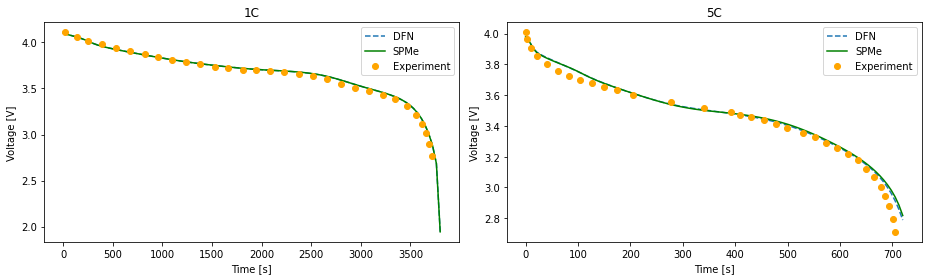

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C results
t_sol1 = solutions1[0]["Time [s]"].entries
t_sol2 = solutions2[0]["Time [s]"].entries
ax1.plot(t_sol1, solutions1[0]["Terminal voltage [V]"](t_sol1), linestyle='--')
ax1.plot(t_sol2, solutions2[0]["Terminal voltage [V]"](t_sol2), color='green')
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
ax1.set_title("1C")
ax1.legend(["DFN", "SPMe", "Experiment"], loc="best")

# plot the 5C results
t_sol1 = solutions1[1]["Time [s]"].entries
t_sol2 = solutions2[1]["Time [s]"].entries
ax2.plot(t_sol1, solutions1[1]["Terminal voltage [V]"](t_sol1), linestyle='--')
ax2.plot(t_sol2, solutions2[1]["Terminal voltage [V]"](t_sol2), color='green')
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]")
ax2.set_title("5C")
ax2.legend(["DFN", "SPMe", "Experiment"], loc="best")

plt.tight_layout()
plt.show()

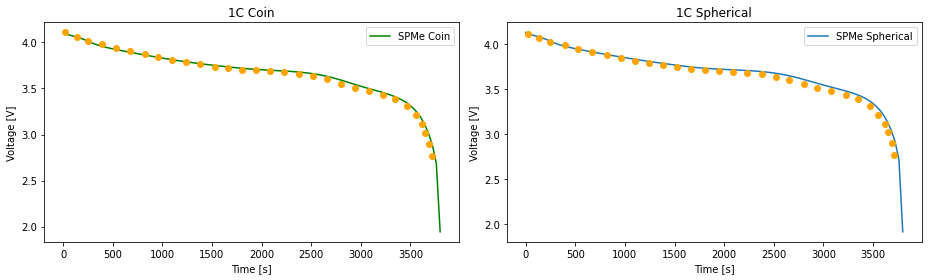

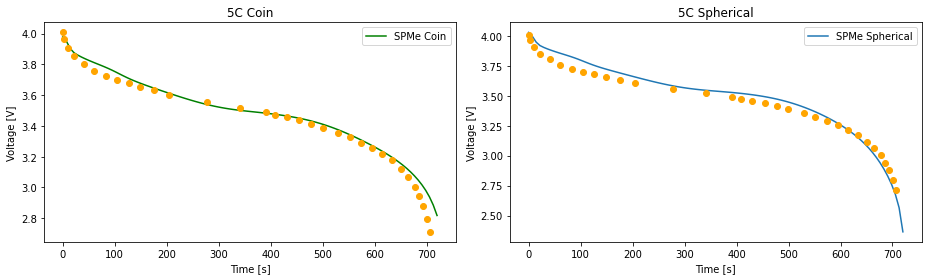

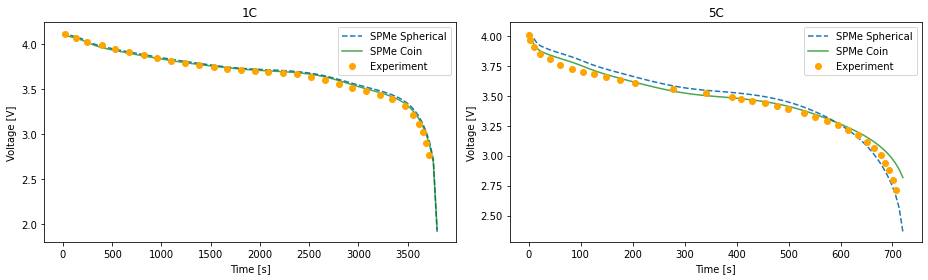

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Coin results
t_sol2 = solutions2[0]["Time [s]"].entries
ax1.plot(t_sol2, solutions2[0]["Terminal voltage [V]"](t_sol2), color='green', label="SPMe Coin")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
ax1.set_title("1C Coin")
ax1.legend(loc="best")

# plot the 1C Spherical results
t_sol4 = solutions4[0]["Time [s]"].entries
ax2.plot(t_sol4, solutions4[0]["Terminal voltage [V]"](t_sol4), label="SPMe Spherical")
ax2.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]")
ax2.set_title("1C Spherical")
ax2.legend(loc="best")

plt.tight_layout()
plt.show()

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(13, 4))
# plot the 5C Coin results
t_sol2 = solutions2[1]["Time [s]"].entries
ax3.plot(t_sol2, solutions2[1]["Terminal voltage [V]"](t_sol2), color='green', label="SPMe Coin")
ax3.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Voltage [V]")
ax3.set_title("5C Coin")
ax3.legend(loc="best")

# plot the 5C Spherical results
t_sol4 = solutions4[1]["Time [s]"].entries
ax4.plot(t_sol4, solutions4[1]["Terminal voltage [V]"](t_sol4), label="SPMe Spherical")
ax4.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax4.set_xlabel("Time [s]")
ax4.set_ylabel("Voltage [V]")
ax4.set_title("5C Spherical")
ax4.legend(loc="best")

plt.tight_layout()
plt.show()

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C results
t_sol4 = solutions4[0]["Time [s]"].entries
t_sol2 = solutions2[0]["Time [s]"].entries
ax5.plot(t_sol4, solutions4[0]["Terminal voltage [V]"](t_sol4), linestyle='--')
ax5.plot(t_sol2, solutions2[0]["Terminal voltage [V]"](t_sol2), color='green', alpha=0.7)
ax5.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax5.set_xlabel("Time [s]")
ax5.set_ylabel("Voltage [V]")
ax5.set_title("1C")
ax5.legend(["SPMe Spherical", "SPMe Coin", "Experiment"], loc="best")

# plot the 5C results
t_sol4 = solutions4[1]["Time [s]"].entries
t_sol2 = solutions2[1]["Time [s]"].entries
ax6.plot(t_sol4, solutions4[1]["Terminal voltage [V]"](t_sol4), linestyle='--')
ax6.plot(t_sol2, solutions2[1]["Terminal voltage [V]"](t_sol2), color='green', alpha=0.7)
ax6.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax6.set_xlabel("Time [s]")
ax6.set_ylabel("Voltage [V]")
ax6.set_title("5C")
ax6.legend(["SPMe Spherical", "SPMe Coin", "Experiment"], loc="best")

plt.tight_layout()
plt.show()

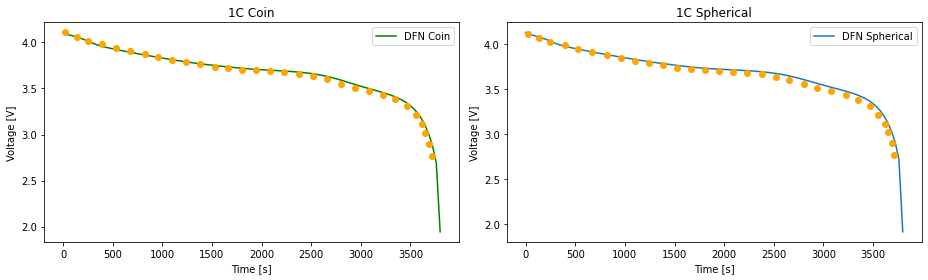

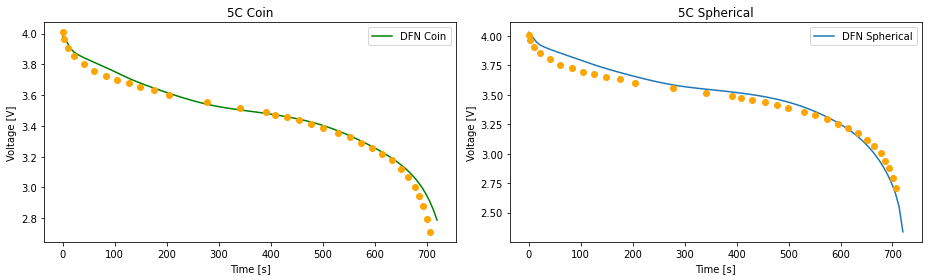

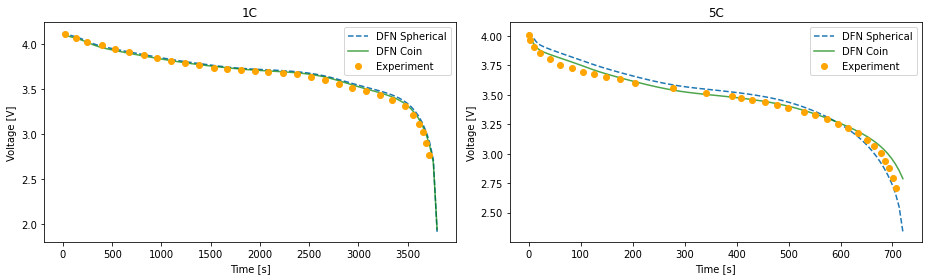

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Coin results
t_sol1 = solutions1[0]["Time [s]"].entries
ax1.plot(t_sol1, solutions1[0]["Terminal voltage [V]"](t_sol1), color='green', label="DFN Coin")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
ax1.set_title("1C Coin")
ax1.legend(loc="best")

# plot the 1C Spherical results
t_sol3 = solutions3[0]["Time [s]"].entries
ax2.plot(t_sol3, solutions3[0]["Terminal voltage [V]"](t_sol3), label="DFN Spherical")
ax2.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]")
ax2.set_title("1C Spherical")
ax2.legend(loc="best")

plt.tight_layout()
plt.show()

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(13, 4))
# plot the 5C Coin results
t_sol1 = solutions1[1]["Time [s]"].entries
ax3.plot(t_sol1, solutions1[1]["Terminal voltage [V]"](t_sol1), color='green', label="DFN Coin")
ax3.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Voltage [V]")
ax3.set_title("5C Coin")
ax3.legend(loc="best")

# plot the 5C Spherical results
t_sol3 = solutions3[1]["Time [s]"].entries
ax4.plot(t_sol3, solutions3[1]["Terminal voltage [V]"](t_sol3), label="DFN Spherical")
ax4.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax4.set_xlabel("Time [s]")
ax4.set_ylabel("Voltage [V]")
ax4.set_title("5C Spherical")
ax4.legend(loc="best")

plt.tight_layout()
plt.show()

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C results
t_sol3 = solutions3[0]["Time [s]"].entries
t_sol1 = solutions1[0]["Time [s]"].entries
ax5.plot(t_sol3, solutions3[0]["Terminal voltage [V]"](t_sol3), linestyle='--')
ax5.plot(t_sol1, solutions1[0]["Terminal voltage [V]"](t_sol1), color='green', alpha=0.7)
ax5.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax5.set_xlabel("Time [s]")
ax5.set_ylabel("Voltage [V]")
ax5.set_title("1C")
ax5.legend(["DFN Spherical", "DFN Coin", "Experiment"], loc="best")

# plot the 5C results
t_sol3 = solutions3[1]["Time [s]"].entries
t_sol1 = solutions1[1]["Time [s]"].entries
ax6.plot(t_sol3, solutions3[1]["Terminal voltage [V]"](t_sol3), linestyle='--')
ax6.plot(t_sol1, solutions1[1]["Terminal voltage [V]"](t_sol1), color='green', alpha=0.7)
ax6.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax6.set_xlabel("Time [s]")
ax6.set_ylabel("Voltage [V]")
ax6.set_title("5C")
ax6.legend(["DFN Spherical", "DFN Coin", "Experiment"], loc="best")

plt.tight_layout()
plt.show()